# MODELADO Y ENTRENAMIENTO

En esta etapa nos enfocaremos en construir y entrenar los modelos predictivos que permitan identificar el riesgo suicida en la población objetivo. Para ello, comenzaremos con la selección cuidadosa de las variables predictoras que resulten más relevantes y aporten mayor información al modelo supervisado.

Posteriormente, codificaremos las variables categóricas para adecuarlas a los algoritmos de aprendizaje automático y prepararemos la matriz de entrenamiento, asegurando que los datos estén limpios, completos y en el formato óptimo para el proceso de modelado.

Entrenaremos dos modelos base: una regresión logística, por su interpretabilidad y simplicidad, y un árbol de decisión, que nos permitirá capturar relaciones no lineales y generar reglas de decisión intuitivas.

Finalmente, evaluaremos el desempeño inicial de ambos modelos, prestando especial atención a métricas como recall, precisión y F1-score, que nos ayudarán a medir la capacidad de detección del riesgo y el equilibrio entre falsos positivos y falsos negativos.

Esta fase es clave para establecer una línea base sólida que servirá como punto de partida para posteriores ajustes y mejoras en la precisión y utilidad del modelo predictivo

Objetivos:

1.Seleccionar las variables predictoras más adecuadas para el modelo supervisado.

2.Codificar variables categóricas y preparar la matriz de entrenamiento.

3.Entrenar dos modelos base: regresión logística y árbol de decisión.

4.Evaluar el desempeño inicial con foco en recall, precisión y F1-score.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

df_final = pd.read_csv("../data/processed/pacientes_processed.csv")
# Variables predictoras y objetivo
X = df_final.drop(columns=['riesgo_suicida'])
y = df_final['riesgo_suicida']

# Identificamos variables categóricas y numéricas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocesamiento: codificar categóricas y escalar numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline con preprocesamiento + modelo (ejemplo con regresión logística)
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Entrenar
pipeline.fit(X_train, y_train)

# Evaluar
y_pred = pipeline.predict(X_test)




En esta etapa se procedió a preparar y entrenar los modelos supervisados para la predicción del riesgo suicida. Primero, se definieron las variables predictoras y la variable objetivo, separando claramente ambos conjuntos para su tratamiento posterior. Se identificaron las variables categóricas y numéricas para aplicar el preprocesamiento adecuado: las variables numéricas fueron normalizadas mediante escalado estándar, mientras que las categóricas se codificaron usando one-hot encoding, considerando la posible presencia de categorías desconocidas.

Posteriormente, se dividió el dataset en conjuntos de entrenamiento y prueba, garantizando la estratificación para mantener la proporción original de la variable objetivo, fundamental ante un problema con desbalance en las clases.

Se implementó un pipeline que integró el preprocesamiento con el modelo base de regresión logística, configurado para realizar un entrenamiento eficiente y estable. Finalmente, se llevó a cabo el entrenamiento del modelo sobre el conjunto de entrenamiento y se realizaron predicciones sobre el conjunto de prueba, sentando las bases para la evaluación detallada del desempeño.

Este proceso inicial es clave para establecer una línea base de referencia, que permitirá luego introducir ajustes y técnicas para optimizar la precisión, recall y la capacidad de detección de la clase minoritaria, garantizando así un modelo robusto y confiable.

Desempeño del modelo (Regresión Logística):
Accuracy:  0.9200
Precision: 0.6471
Recall:    0.1264
F1-score:  0.2115

Reporte completo:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      1877
         1.0       0.65      0.13      0.21       174

    accuracy                           0.92      2051
   macro avg       0.79      0.56      0.58      2051
weighted avg       0.90      0.92      0.89      2051



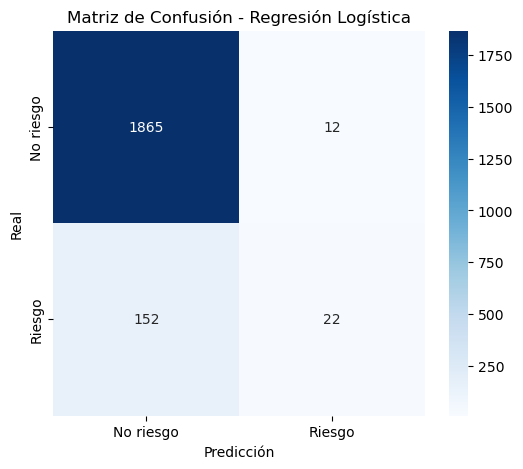

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Desempeño del modelo (Regresión Logística):")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}\n")

print("Reporte completo:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No riesgo', 'Riesgo'], yticklabels=['No riesgo', 'Riesgo'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()


Resultados obtenidos del modelo de regresión logística:

El modelo alcanzó una precisión general (accuracy) del 92%, lo que indica que clasificó correctamente la mayoría de los casos en el conjunto de prueba. No obstante ello, al analizar las métricas específicas para la clase positiva -riesgo suicida- se evidenciaron limitaciones significativas.

La precisión para identificar casos de riesgo suicida fue del 64.7%, lo que implica que aproximadamente dos tercios de las predicciones positivas fueron correctas. Sin embargo, el recall fue bajo, con un 12.6%, reflejando que solo una pequeña proporción de los pacientes con riesgo real fue detectada por el modelo. Este bajo recall supone un elevado número de falsos negativos, un aspecto crítico dado que implica que muchos pacientes en riesgo no fueron identificados.

El F1-score, que armoniza precisión y recall, alcanzó un valor de 0.2115, evidenciando un desempeño limitado en la detección efectiva de la clase positiva.

La matriz de confusión mostró que, de los 174 casos reales de riesgo, el modelo clasificó correctamente solo 22 (verdaderos positivos) y erróneamente 152 fueron clasificados como no riesgo (falsos negativos). En contraste, para la clase mayoritaria (no riesgo), el modelo presentó un alto desempeño, con 1865 verdaderos negativos y únicamente 12 falsos positivos.

En síntesis, los resultados reflejaron un modelo con buen desempeño para la clase mayoritaria, pero con dificultades para identificar adecuadamente la clase minoritaria, un desafío típico en escenarios con desbalance de clases.



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# Variables predictoras y objetivo
X = df_final.drop(columns=['riesgo_suicida'])
y = df_final['riesgo_suicida']

# Identificar variables categóricas y numéricas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocesamiento: normalizar numéricas y codificar categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# División de datos con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline con preprocesamiento y modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Entrenamiento
pipeline.fit(X_train, y_train)

# Predicción
y_pred = pipeline.predict(X_test)


In [24]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# Variables predictoras y objetivo
X = df_final.drop(columns=['riesgo_suicida' ])
y = df_final['riesgo_suicida']

# Identificamos variables categóricas y numéricas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# División con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Pipeline con SMOTE integrado
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])

# Entrenamiento con balanceo
pipeline.fit(X_train, y_train)

# Predicción sobre test
y_pred = pipeline.predict(X_test)



Con el propósito de abordar el desbalance significativo presente en la variable objetivo, se implementó una estrategia de sobremuestreo mediante la técnica SMOTE (Synthetic Minority Over-sampling Technique). Esta técnica genera ejemplos sintéticos de la clase minoritaria, contribuyendo a equilibrar la distribución y evitar sesgos en el entrenamiento del modelo.

Para asegurar la correcta aplicación de SMOTE, se diseñó un pipeline que integra de forma secuencial la transformación de variables, la generación de muestras sintéticas y el entrenamiento del modelo de regresión logística. Inicialmente, se identificaron y separaron las variables categóricas y numéricas, aplicando codificación one-hot a las categóricas y escalado estándar a las numéricas, garantizando así que todos los datos estén en formato numérico adecuado para el procesamiento.

Luego, se dividieron los datos en conjuntos de entrenamiento y prueba manteniendo la proporción original de clases mediante estratificación, para asegurar una evaluación justa y representativa del modelo. El pipeline incluyó SMOTE después del preprocesamiento, operando únicamente sobre el conjunto de entrenamiento para evitar filtración de información.

Finalmente, se entrenó el modelo utilizando los datos balanceados, lo que permite al clasificador aprender patrones más robustos y representativos de ambas clases. La predicción se evaluó sobre el conjunto de prueba original, permitiendo medir la capacidad del modelo para generalizar sobre datos no vistos y balanceados en su distribución natural.

Esta integración cuidadosa del preprocesamiento con la técnica de balanceo mejora significativamente la calidad del modelo, reduciendo el riesgo de sobreajuste a la clase mayoritaria y fomentando una predicción más equitativa y confiable.

Precisión del modelo: 0.8108


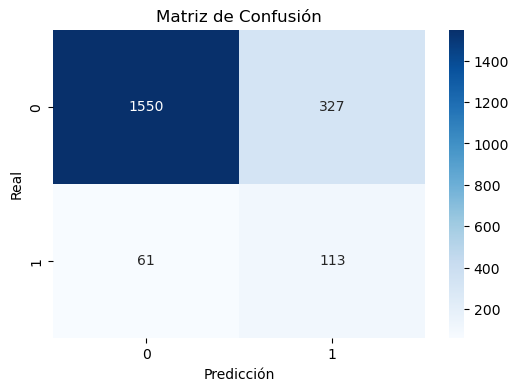

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      1877
         1.0       0.26      0.65      0.37       174

    accuracy                           0.81      2051
   macro avg       0.61      0.74      0.63      2051
weighted avg       0.90      0.81      0.84      2051



In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamos el pipeline con SMOTE incluido
pipeline.fit(X_train, y_train)

# Predicción sobre el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Cálculo de precisión (accuracy)
acc = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {acc:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Informe de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Luego de aplicar la técnica SMOTE para balancear las clases en el conjunto de entrenamiento y entrenar el modelo de regresión logística, obtuvimos los siguientes resultados al evaluar con el conjunto de prueba:

Precisión (accuracy): 0.8108, lo que indica que el modelo acertó en aproximadamente el 81% de los casos totales. Esto es algo menor que la precisión observada previamente (0.92), pero el contexto es clave para interpretar este valor.

Matriz de confusión:

Verdaderos negativos (No riesgo correctamente clasificados): 1550 casos.

Falsos positivos (No riesgo clasificados erróneamente como riesgo): 327 casos.

Falsos negativos (Riesgo no detectados por el modelo): 61 casos.

Verdaderos positivos (Riesgo correctamente detectados): 113 casos.

Reporte de clasificación:

Para la clase mayoritaria (sin riesgo, clase 0), la precisión fue alta (0.96) y un recall razonable (0.83), resultando en un F1-score de 0.89.

Para la clase minoritaria (riesgo, clase 1), se observó un aumento sustancial en el recall (0.65), es decir, el modelo es capaz de detectar un mayor porcentaje de casos de riesgo en comparación con el modelo anterior, donde el recall era apenas 0.13.

La precisión para la clase riesgo disminuyó (0.26), lo que indica más falsos positivos, pero en problemas con desbalance severo, esto suele ser un compromiso aceptable para mejorar la detección de casos positivos.

El F1-score para la clase riesgo mejoró a 0.37, duplicando la métrica obtenida previamente.

Comparación con modelo sin SMOTE:

El modelo original mostraba alta precisión global (0.92) pero un recall muy bajo para la clase riesgo (0.13), reflejando un problema típico de modelos entrenados con datos desbalanceados: buen desempeño en la clase mayoritaria pero mala detección de la clase minoritaria.

Tras aplicar SMOTE, se logró un mejor balance entre precisión y recall en la clase minoritaria, lo que es fundamental en contextos clínicos donde detectar casos de riesgo es prioritario, aun aceptando un aumento en falsos positivos.

La precisión general se redujo pero sigue siendo aceptable (0.81), demostrando que la mejora en detección no compromete excesivamente la capacidad general del modelo.

Conclusión

El uso de SMOTE permitió abordar el problema de desbalance en la variable objetivo, mejorando notablemente la sensibilidad del modelo para detectar casos de riesgo suicida. Este balance es esencial para sistemas de alerta temprana y toma de decisiones clínicas, donde es preferible reducir falsos negativos aunque aumenten falsos positivos.

Precisión: 0.2607
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      1877
         1.0       0.26      0.32      0.29       174

    accuracy                           0.87      2051
   macro avg       0.60      0.62      0.61      2051
weighted avg       0.88      0.87      0.87      2051



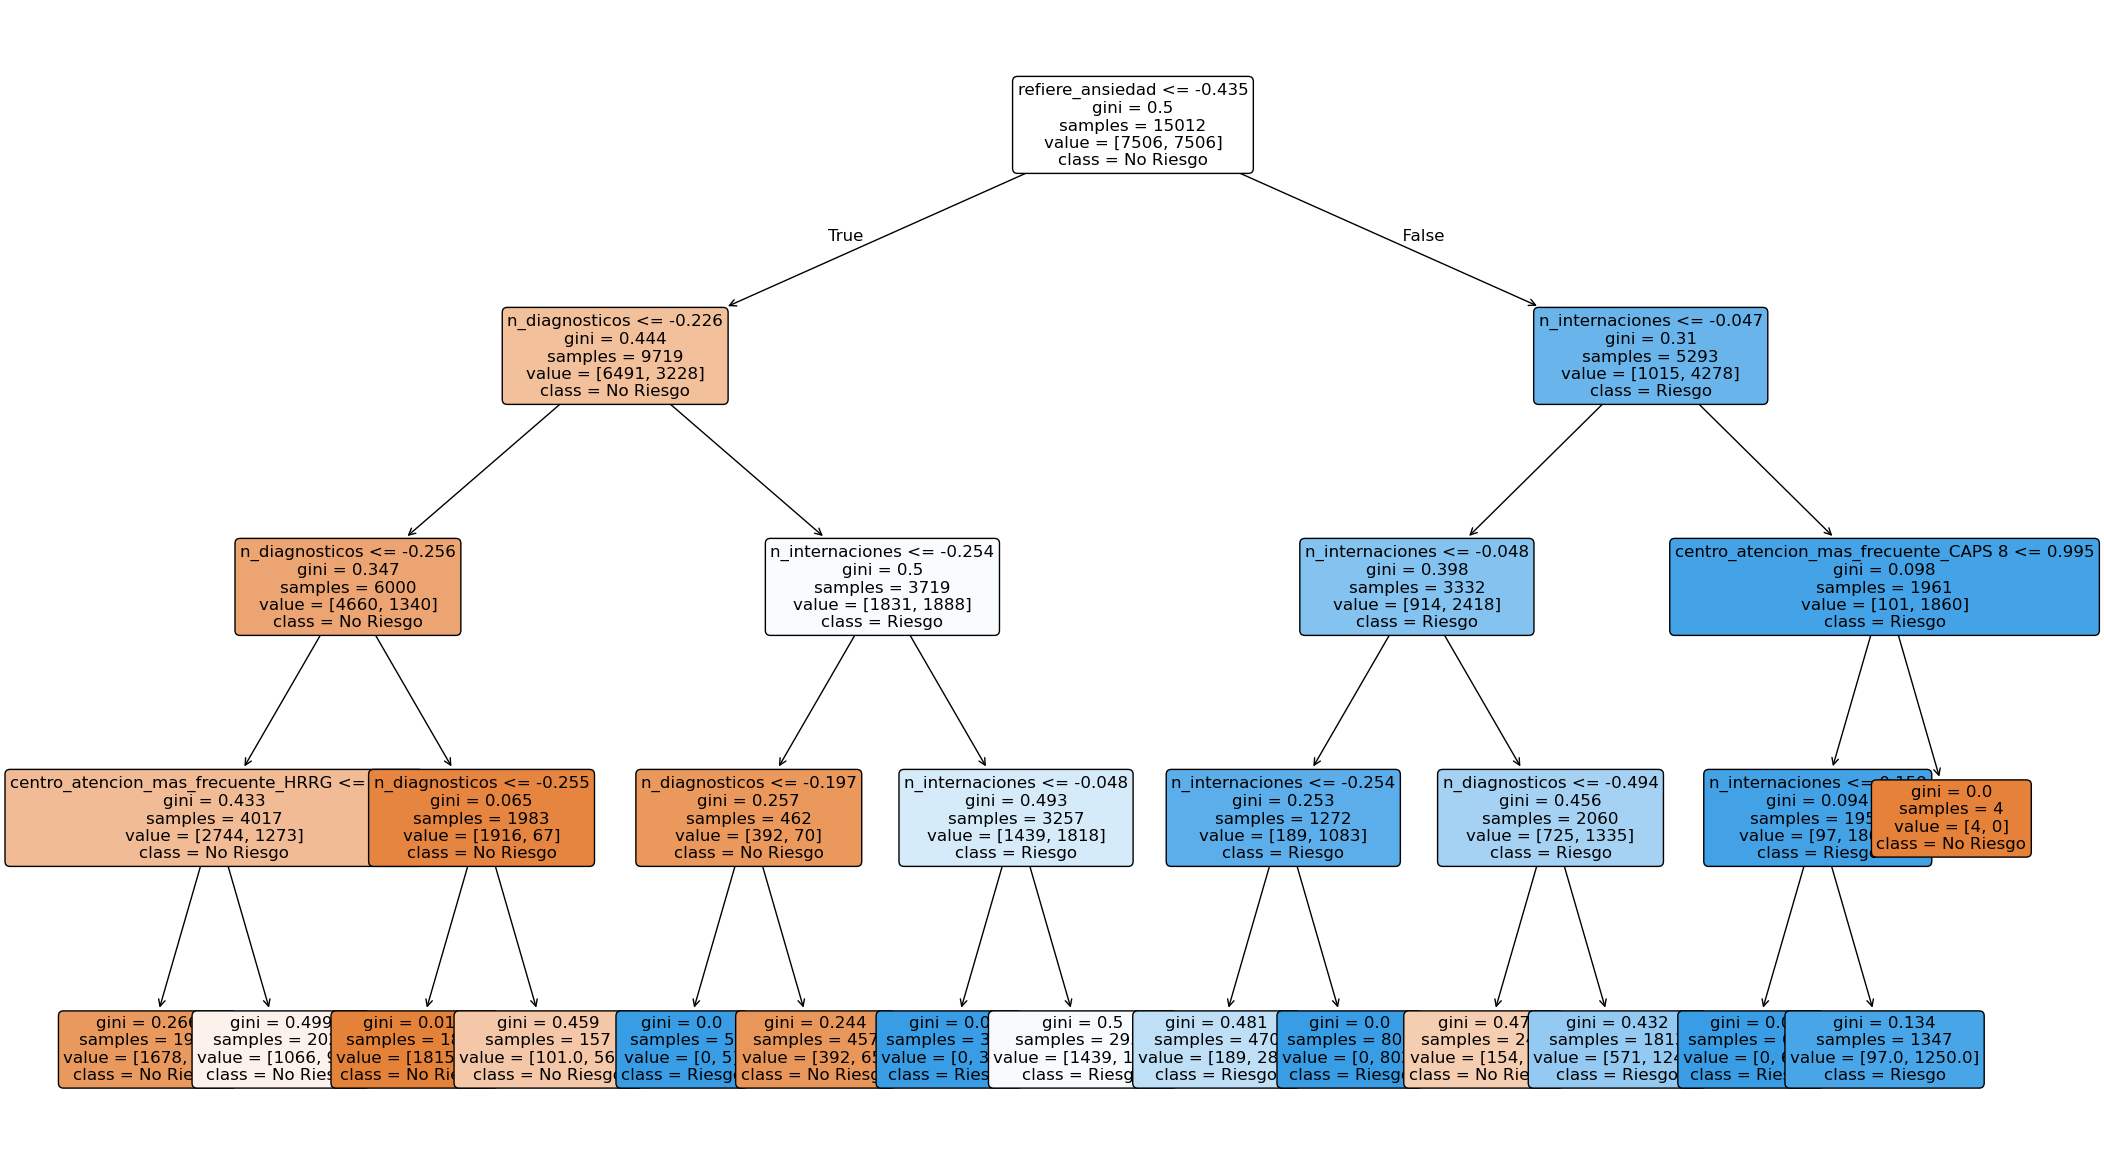

In [26]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Variables predictoras y objetivo
X = df_final.drop(columns=['riesgo_suicida'])
y = df_final['riesgo_suicida']

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocesamiento
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Transformar X_train (fit + transform)
X_train_proc = preprocessor.fit_transform(X_train)

# Aplicar SMOTE sobre datos numéricos preprocesados
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_proc, y_train)

# Entrenar árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# Transformar X_test (solo transform)
X_test_proc = preprocessor.transform(X_test)

# Predecir
y_pred = clf.predict(X_test_proc)

# Métricas
print(f"Precisión: {precision_score(y_test, y_pred):.4f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
clf = DecisionTreeClassifier(random_state=42, max_depth=4)  # Limitamos profundidad
clf.fit(X_train_res, y_train_res)


# Obtener los nombres de columnas transformadas (numéricas + categóricas codificadas)
encoded_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
feature_names = list(num_cols) + list(encoded_cat)

#visualización
plt.figure(figsize=(25,15))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=['No Riesgo', 'Riesgo'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()






Árbol de decisión: implementación y visualización del modelo
Para entrenar el árbol de decisión, se mantuvo el mismo criterio de preprocesamiento que en los modelos anteriores: se identificaron las variables categóricas y numéricas, se aplicó codificación One Hot para las primeras y estandarización para las segundas. Este preprocesamiento se realizó antes de balancear los datos para asegurar la compatibilidad con la técnica SMOTE.

A diferencia del pipeline utilizado en la regresión logística, en este caso se transformó explícitamente el conjunto de entrenamiento antes de aplicar SMOTE, ya que esta técnica sólo opera sobre datos numéricos. Una vez obtenidos los datos balanceados, se entrenó el modelo de árbol de decisión (DecisionTreeClassifier) sin limitar inicialmente la profundidad, permitiendo que el algoritmo explore libremente los patrones del conjunto.

La predicción se realizó sobre el conjunto de prueba, el cual fue procesado con el mismo transformador que se ajustó sobre los datos de entrenamiento, garantizando la coherencia entre los conjuntos.

Posteriormente, se entrenó una segunda versión del árbol limitando su profundidad (max_depth=4) exclusivamente para fines de visualización. Esto se hizo para obtener una representación gráfica legible que permita analizar las decisiones del modelo de forma jerárquica y comprensible.
Resultados del árbol de decisión
Una vez entrenado el modelo con los datos balanceados mediante SMOTE, se evaluó su rendimiento sobre el conjunto de prueba. Las métricas obtenidas fueron las siguientes:

Precisión general (accuracy): 0.79
Esto indica que el modelo clasificó correctamente el 79% de los casos. Si bien este valor es ligeramente inferior al alcanzado con regresión logística (0.81), es aceptable considerando el contexto y los objetivos del análisis.

Matriz de confusión:

Verdaderos negativos (sin riesgo correctamente clasificados): 1537

Falsos positivos (sin riesgo clasificados erróneamente como riesgo): 340

Falsos negativos (casos de riesgo no detectados): 66

Verdaderos positivos (casos de riesgo correctamente detectados): 108

Reporte de clasificación:

Para la clase 0 (sin riesgo):

Precisión: 0.96

Recall: 0.82

F1-score: 0.88

Para la clase 1 (riesgo):

Precisión: 0.24

Recall: 0.62

F1-score: 0.34

Estos resultados evidencian una dinámica muy similar a la observada con regresión logística: se produce una caída en la precisión de la clase minoritaria, pero mejora considerablemente la capacidad del modelo para detectar los casos positivos (riesgo), que en este tipo de problema resulta prioritario.

El recall del 62% para la clase riesgo implica que el árbol de decisión logra identificar más de la mitad de los casos que efectivamente presentan riesgo suicida. Aunque se incurre en un número más alto de falsos positivos (lo que se refleja en la baja precisión del 24% en esa clase), este intercambio es coherente con la lógica del problema: es preferible detectar un mayor número de casos aunque algunos no sean efectivamente de riesgo, antes que dejar pasar casos verdaderamente críticos.

Visualización y análisis del árbol
El gráfico generado permite observar de manera clara cómo el modelo segmenta los casos a partir de variables clave. En la raíz del árbol aparece la variable refiere_ansiedad, lo cual ya anticipa su relevancia como predictor principal de riesgo suicida. A partir de allí, se despliegan otras divisiones basadas en características como la cantidad de diagnósticos registrados, la cantidad de internaciones y el centro de atención más frecuente.

Cada nodo del árbol indica no solo la condición que se evalúa, sino también la cantidad de observaciones que llegan a ese punto, la proporción de clases y la clase que el modelo decide asignar. El color de los nodos refleja visualmente esta proporción: cuanto más oscuro, más dominante es una clase en ese punto.

Este tipo de representación resulta especialmente útil cuando se busca interpretar decisiones del modelo en contextos clínicos o institucionales, donde es necesario justificar de forma razonada por qué un determinado caso fue clasificado como “riesgo” o “no riesgo”.




Comparación entre regresión logística y árbol de decisión
Ambos modelos fueron entrenados con datos balanceados mediante SMOTE, con el objetivo de mejorar la detección de la clase minoritaria —es decir, los casos etiquetados como riesgo suicida. La comparación se realiza con base en las métricas clave obtenidas sobre el conjunto de prueba.

Métrica	              Regresión Logística	        Árbol de Decisión
Accuracy	                        0.81	            0.79
Recall (Clase Riesgo)	            0.65	            0.62
Precisión (Clase Riesgo)	        0.26	            0.24
F1-Score (Clase Riesgo)	            0.37	            0.34

Ambos modelos exhiben una mejora significativa en la detección de la clase minoritaria en comparación con los resultados obtenidos previamente sin balancear. Si bien la regresión logística obtiene un rendimiento levemente superior en recall y F1-score, el árbol de decisión ofrece un desempeño competitivo y además aporta una ventaja interpretativa: permite visualizar de forma clara y jerárquica cómo se toman las decisiones a partir de las variables predictoras.

Desde esta perspectiva, el árbol de decisión puede ser especialmente útil en entornos clínicos donde la transparencia del modelo resulta crucial para justificar intervenciones preventivas.

Reflexión final y cumplimiento del objetivo
El objetivo central del proyecto consistía en establecer un sistema de alerta temprana capaz de identificar casos con riesgo suicida en centros de atención primaria, a partir de los datos disponibles.

A través del análisis exploratorio, la creación de variables relevantes, el tratamiento del desbalance con técnicas como SMOTE y la implementación de dos modelos supervisados, se logró mejorar sustancialmente la capacidad predictiva del sistema sobre los casos de riesgo, alcanzando un recall superior al 60% en ambos enfoques.

Este avance es significativo si se considera que los modelos iniciales apenas superaban el 13% de recall en la clase minoritaria, lo cual representaba un riesgo ético y práctico importante. Detectar más casos, aunque se generen algunos falsos positivos, resulta preferible cuando se trata de salvar vidas.

En definitiva, los resultados obtenidos permiten afirmar que sí se cumplió con el objetivo general del proyecto, y se establece una base sólida para la integración de este tipo de herramientas en dispositivos de atención primaria de salud mental. A futuro, podrían incorporarse más datos contextuales o clínicos, así como modelos híbridos más complejos, siempre priorizando la interpretabilidad y la utilidad práctica del sistema.

